In [1]:
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import os
sys.path.append("../scripts")
import stock_eda
import news_eda
import technical_indicators as ti
import sentiment_analyzer as san

In [2]:
# Load news and stock data
news_data = news_eda.load_data("../data/raw_analyst_ratings.csv")
stock_data = stock_eda.load_data("../data/AMZN_historical_data.csv")

In [3]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [5]:
# Convert 'date' column in news data and 'Date' column in stock data to datetime
news_data = news_eda.convert_date(news_data)
stock_data = stock_eda.convert_date(stock_data)

In [6]:
news_data = news_data[news_data['stock'] == 'AMZN']
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
76177,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10 13:18:50,AMZN
76178,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26,AMZN
76179,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47,AMZN
76180,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10 07:20:03,AMZN
76181,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10 00:52:01,AMZN


In [7]:
# Filter stock data to match the date range of news data
start_date = news_data['date'].min()
end_date = news_data['date'].max()
stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]

In [8]:
# Sentiment analysis
san.sentiment_category(news_data)

,Unnamed: 0,headline,url,publisher,date,stock,sentiment_class,sentiment_score
76177,76869,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10 13:18:50,AMZN,Positive,0.1779
76178,76870,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26,AMZN,Positive,0.5574
76179,76871,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47,AMZN,Positive,0.2023
76180,76872,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10 07:20:03,AMZN,Positive,0.6486
76181,76873,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10 00:52:01,AMZN,Positive,0.0516
...,...,...,...,...,...,...,...,...
76450,77194,3 Sector ETFs For This Week's Earnings Parade,https://www.benzinga.com/news/earnings/20/04/1...,ETF Professor,2020-04-27 00:00:00,AMZN,Neutral,0.0000
76451,77195,Amazon Statement Shows Co. Extends Closure Of ...,https://www.benzinga.com/news/20/04/15888140/a...,Benzinga Newsdesk,2020-04-27 00:00:00,AMZN,Positive,0.2960
76452,77196,Will COVID-19 Accelerate The Adoption Of Auton...,https://www.benzinga.com/news/20/04/15887271/w...,FreightWaves,2020-04-27 00:00:00,AMZN,Neutral,0.0000
76453,77197,SunTrust Robinson Humphrey Maintains Buy on Am...,https://www.benzinga.com/news/20/04/15885780/s...,Vick Meyer,2020-04-27 00:00:00,AMZN,Neutral,0.0000


In [9]:
# Calculate daily returns for stock
stock_data['daily_return'] = stock_data['Close'].pct_change()

# Rename columns to avoid conflicts
news_data.rename(columns={'date': 'Date'}, inplace=True)

In [10]:
# Merge news data with stock data on Date
combined_data = pd.merge(stock_data, news_data, on='Date', how='left')


In [11]:
# Aggregate sentiment scores by date
daily_sentiment = combined_data.groupby('Date')['sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'sentiment_score': 'average_sentiment_score'}, inplace=True)

In [12]:
# Merge aggregated sentiment with combined data
final_data = pd.merge(combined_data, daily_sentiment, on='Date', how='left')
final_data = final_data[['Date', 'average_sentiment_score', 'Close', 'daily_return']]
final_data.head()

,Date,average_sentiment_score,Close,daily_return
0,2020-04-27,0.128317,118.800003,NaN
1,2020-04-27,0.128317,118.800003,NaN
2,2020-04-27,0.128317,118.800003,NaN
3,2020-04-27,0.128317,118.800003,NaN
4,2020-04-27,0.128317,118.800003,NaN


In [13]:
# Calculate correlation between sentiment and daily return
correlation_return = final_data[['average_sentiment_score', 'daily_return']].corr().iloc[0, 1]
print(f"Correlation between sentiment and daily return: {correlation_return}")

Correlation between sentiment and daily return: 0.19743153147466655


In [14]:
# Calculate correlation between sentiment and closing price
correlation_close = final_data[['average_sentiment_score', 'Close']].corr().iloc[0, 1]
print(f"Correlation between sentiment and closing price: {correlation_close}")

Correlation between sentiment and closing price: 0.13936274761549922


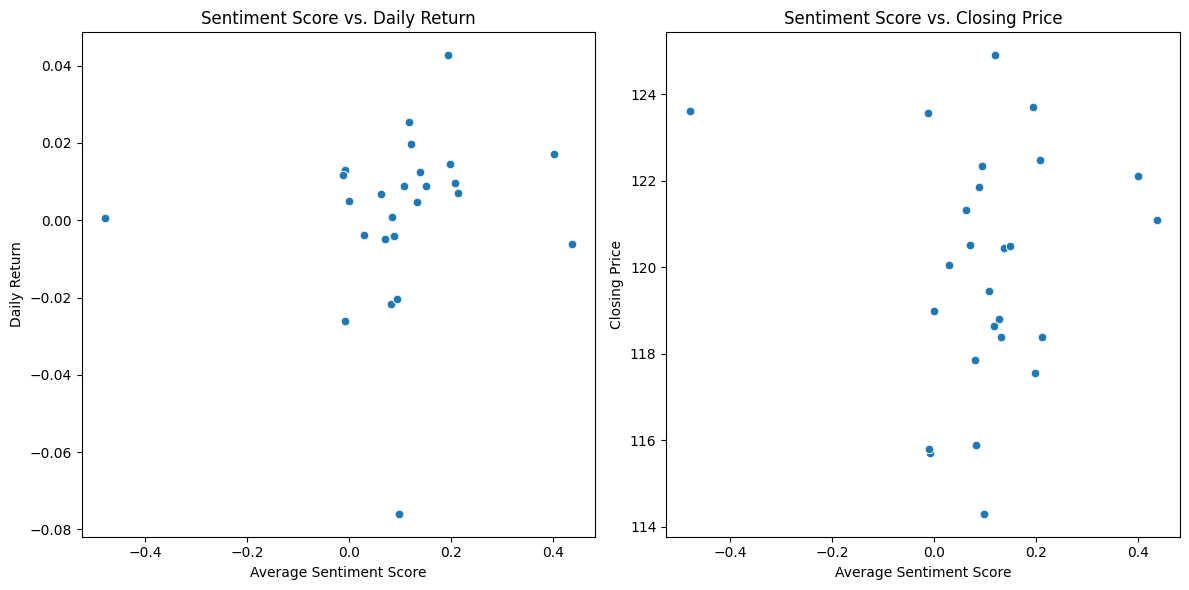

In [15]:
san.plot_scatter(final_data)

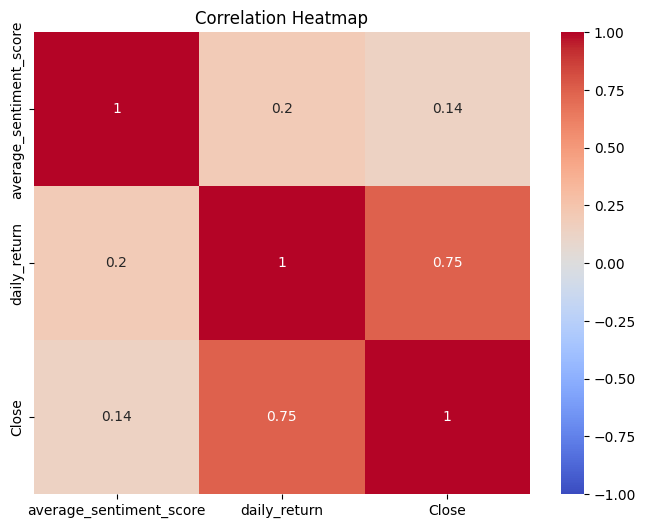

In [16]:
san.plot_heatmap(final_data)